# STEP 1 -  Reading and Understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = "ignore")

from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model      import LinearRegression
from sklearn.metrics           import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
bikes = pd.read_csv(r"C:\Users\pooja\Desktop\LINEAR REGRESSION ASSIGNMENT\day.csv")

In [3]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.shape

(730, 16)

In [5]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Finding any null values


In [7]:
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are no null values

# Finding duplicates

In [8]:
## Copying data frame into new
bikes_copy = bikes.copy()

In [9]:
## Checking the shape of the new dataframe
bikes_copy.shape

(730, 16)

In [10]:
### Dropping the duplicates
bikes_copy.drop_duplicates(inplace=True)

In [11]:
## Re verifying the shape of the dataframe
bikes_copy.shape

(730, 16)

##### As the shape of the new datframe is same  as the old dateframe which indicates there are no duplicates.

### Removing redundant/Unwanted columns

###### The following data columns can be removed .
##### Instant: Its only an index value.

##### dteday : This column has the date, since we have seperate column for month and year , we can mange without this column.

##### casual & registered : Both these columns contains the count of bike booked by different categories of customers. 
##### Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [12]:
bikes = bikes.drop(["instant", "dteday","casual","registered"], axis=1)

In [13]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### MAPPING/ENCODING THE COLUMNS

In [14]:
# Mapping/encoding season column
bikes.season = bikes.season.map({1 : "spring", 2: "summer", 3: "fall", 4: "winter"})

In [15]:
bikes.mnth = bikes.mnth.map({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"})

In [16]:
bikes.weekday = bikes.weekday.map({0:"sun",1:"mon",2:"tue", 3:"wed", 4:"thur", 5:"fri",6:"sat"})

In [17]:
bikes.weathersit = bikes.weathersit.map({1:"clear", 2:"misty", 3:"lightsnow", 4:"heavyrain"})

In [18]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## STEP 2 - Visualising the data

In [19]:
bikes.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

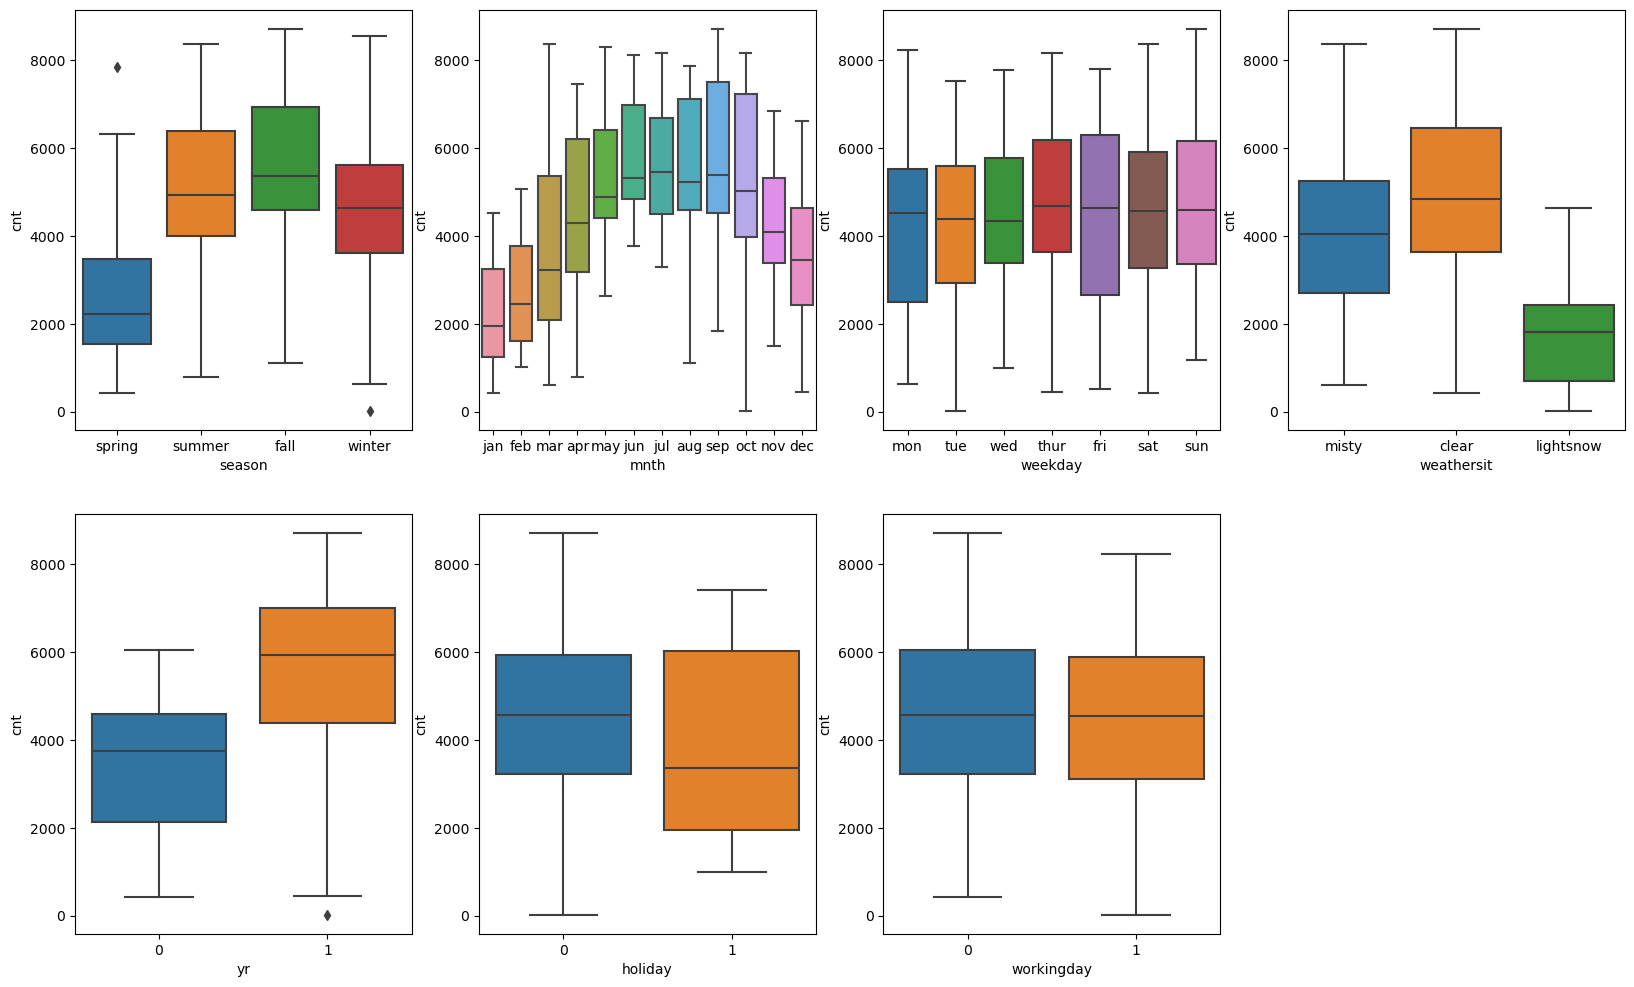

In [20]:
# Analysing and visualising the categorical data
# to see how the predictor variable stands against target variable.

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
sns.boxplot(x= "season", y="cnt", data= bikes)

plt.subplot(2,4,2)
sns.boxplot(x ="mnth", y= "cnt", data= bikes)

plt.subplot(2,4,3)
sns.boxplot(x= "weekday", y= "cnt", data= bikes)

plt.subplot(2,4,4)
sns.boxplot(x= "weathersit", y="cnt", data = bikes)

plt.subplot(2,4,5)
sns.boxplot(x="yr", y="cnt", data= bikes)

plt.subplot(2,4,6)
sns.boxplot(x= "holiday", y= "cnt", data=bikes)

plt.subplot(2,4,7)
sns.boxplot(x="workingday", y="cnt", data= bikes)
plt.show()


In [21]:
def plot_cat_column(column):
    plt.figure(figsize= (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x= column, y="cnt", data= bikes)
    plt.subplot(1,2,2)
    sns.barplot(x= column, y="cnt",data= bikes, hue= "yr", palette ="Set1")
    plt.legend(labels=["2018","2019"])
    plt.show()

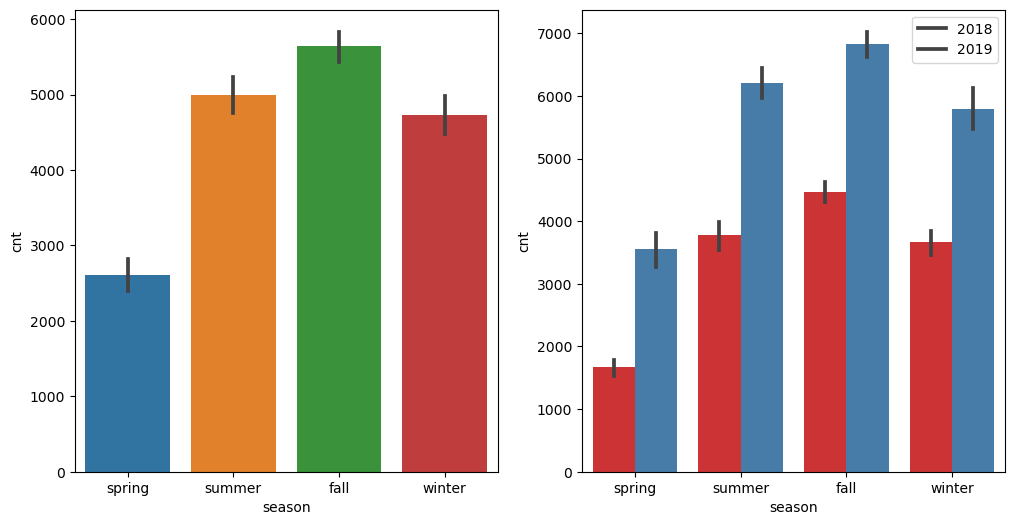

In [22]:
plot_cat_column("season")

#### Fall season seems to have attracted more bookings.
#### And in each season the booking count has increased drastically from 2018 to 2019.

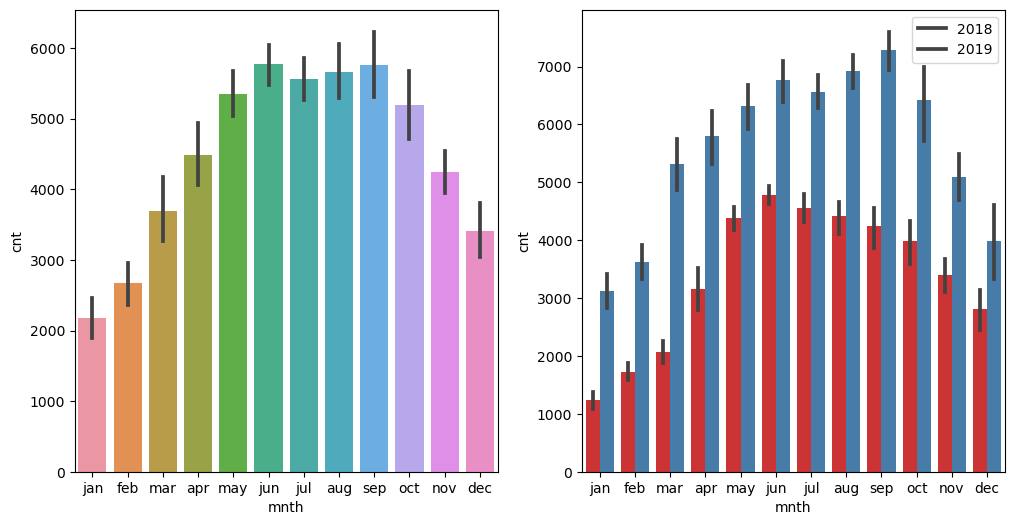

In [23]:
# plotting visualisation for month column
plot_cat_column("mnth")

### Most bookings are done during june, july, august, september and october
### Number of Bookings for each month  increased from 2018 to 2019.

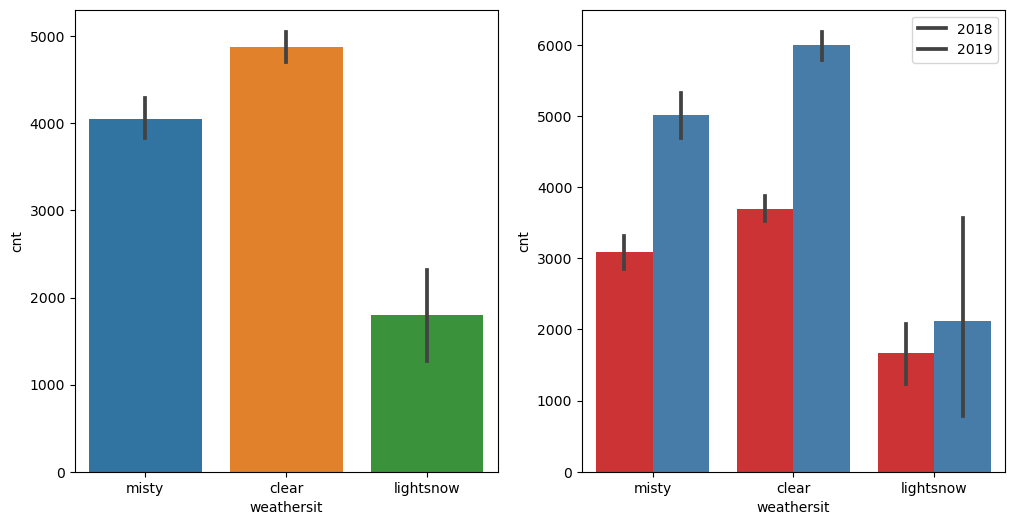

In [24]:
## Plotting visualisation for weathersit data
plot_cat_column("weathersit")

##### 1. Clear weathersit attracted more bookings.
##### 2. 2019 recieved more bookings comapred to 2018.

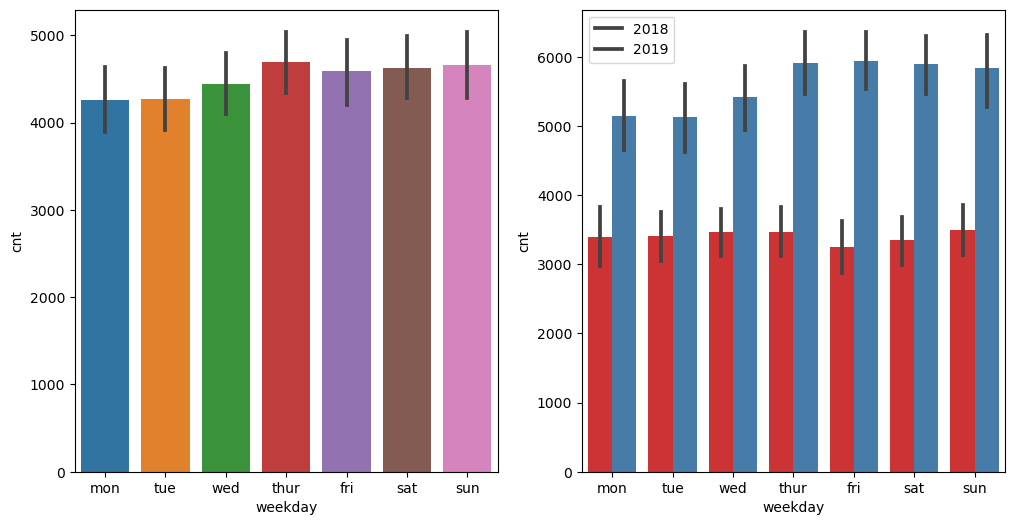

In [25]:
### Plotting visualisation for weekday.
plot_cat_column("weekday")

##### Thursday, Friday, Saturday and sunday has recieved more bookings comapred to the begining of the week.

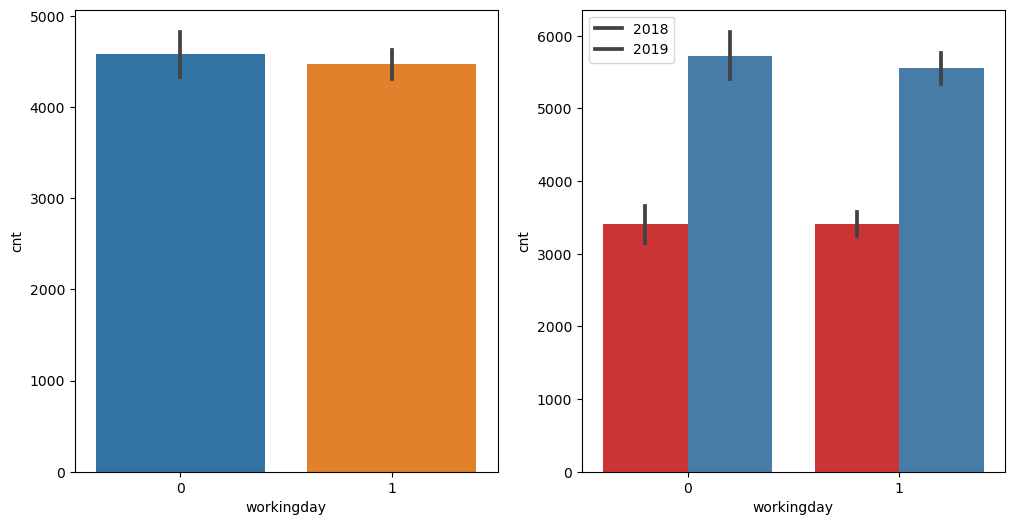

In [26]:
## Plotting visualisation for workingday.
plot_cat_column("workingday")

##### Bookings seemed almost same on working day and non working day but 2019 bookings have increased in comparission to 2018.

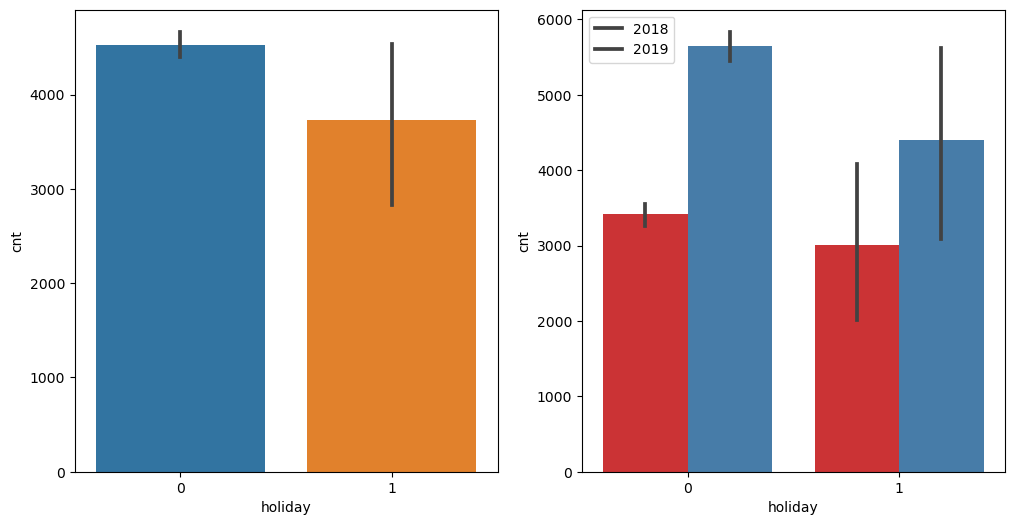

In [27]:
## Plotting visualisation for holiday
plot_cat_column("holiday")

##### "0" indicated non -holiday here. "1" indiactes holiday . non holiday the bookings are higher as well as in 2019.

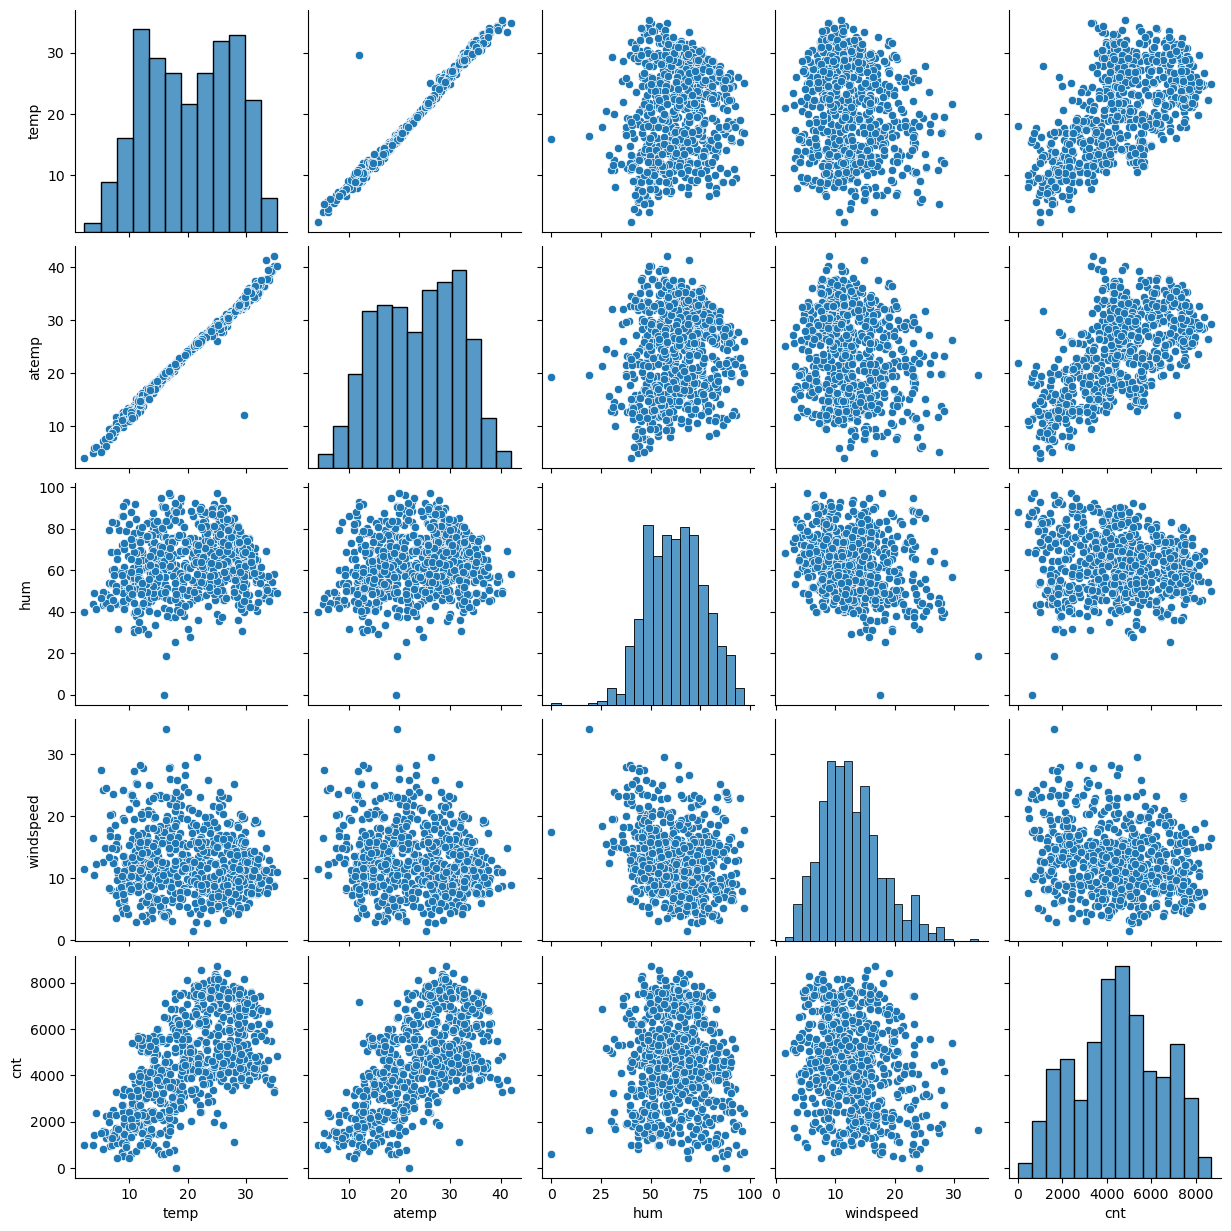

In [28]:
### Analysing/ visualizing neumerical columns
sns.pairplot(data= bikes, vars=["temp","atemp","hum","windspeed","cnt"])
plt.show()

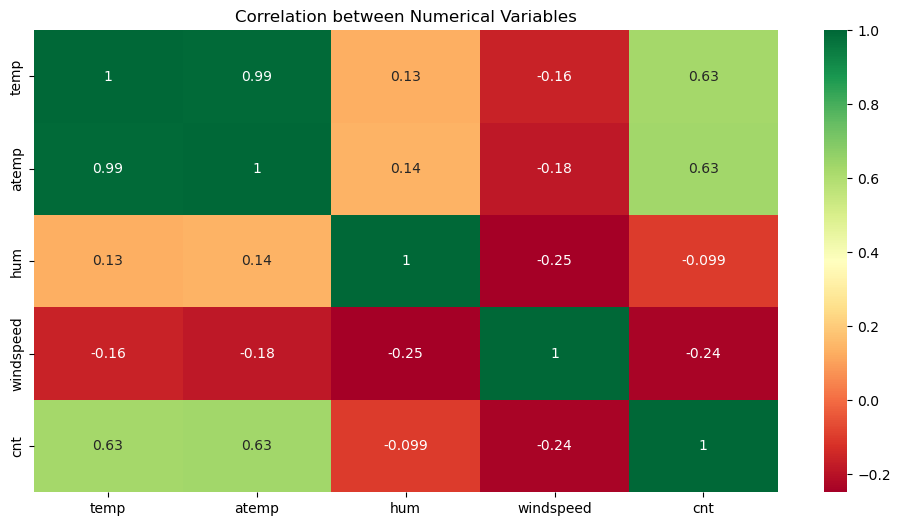

In [29]:
## Checking the correlation between neumerical variables.
plt.figure(figsize=(12,6))
sns.heatmap(bikes[['temp','atemp','hum','windspeed','cnt']].corr(),annot= True, cmap="RdYlGn")
plt.title("Correlation between Numerical Variables")
plt.show()

##### There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. 
##### We will decide which parameters to keep based on VIF and p-value w.r.t other variables

# STEP 3 - Data Preparation

In [30]:
# Creating dummy variables for season,month, weekday and weathersit.
month_df = pd.get_dummies(bikes.mnth, drop_first=True)
season_df = pd.get_dummies(bikes.season, drop_first =True)
weekday_df = pd.get_dummies(bikes.weekday, drop_first=True)
weathersit_df = pd.get_dummies(bikes.weathersit, drop_first=True)

In [31]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [32]:
# Merging the dataframe with the dummy variable data sets
bikes_new = pd.concat([bikes, month_df, season_df, weekday_df, weathersit_df], axis=1)

In [33]:
bikes_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,summer,winter,mon,sat,sun,thur,tue,wed,lightsnow,misty
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thur,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [34]:
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    uint8  
 13  dec         730 non-null    uint8  
 14  feb         730 non-null    uint8  
 15  jan         730 non-null    uint8  
 16  jul         730 non-null    uint8  
 17  jun         730 non-null    uint8  
 18  mar         730 non-null    uint8  
 19  may         730 non-null    u

In [35]:
## Dropping unwanted columns as we have created dummy variables out of it.
bikes_new.drop(["season","weekday","weathersit","mnth"], axis=1, inplace=True)

In [36]:
bikes_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thur,tue,wed,lightsnow,misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   aug         730 non-null    uint8  
 9   dec         730 non-null    uint8  
 10  feb         730 non-null    uint8  
 11  jan         730 non-null    uint8  
 12  jul         730 non-null    uint8  
 13  jun         730 non-null    uint8  
 14  mar         730 non-null    uint8  
 15  may         730 non-null    uint8  
 16  nov         730 non-null    uint8  
 17  oct         730 non-null    uint8  
 18  sep         730 non-null    uint8  
 19  spring      730 non-null    u

## STEP 4- Splitting data into Train set as well as Test set

In [38]:
# Splitting data into train set and test set.
np.random.seed(0)
df_train, df_test= train_test_split(bikes_new, train_size= 0.7, random_state=100)

In [39]:
# Checking the shape of the train_set
df_train.shape

(510, 30)

In [40]:
# Checking the shape of the test_set
df_test.shape

(220, 30)

In [41]:
# Using MinMax scaler to rescalling the features
scaler = MinMaxScaler()

In [42]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thur,tue,wed,lightsnow,misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,1,0,0,0,0,1
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,1,0,0,0,1,0,0,0,0,1


In [43]:
# Apply MinMaxScaler to all numerical varibales except Dummy variables and Yes or No variables.
num_var = ["temp","atemp","hum","windspeed","cnt"]
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [44]:
#Verifying the head after applying the scaler
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thur,tue,wed,lightsnow,misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,1,0,0,0,1,0,0,0,0,1


In [45]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thur,tue,wed,lightsnow,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.247059,0.247059,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.431725,0.431725,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


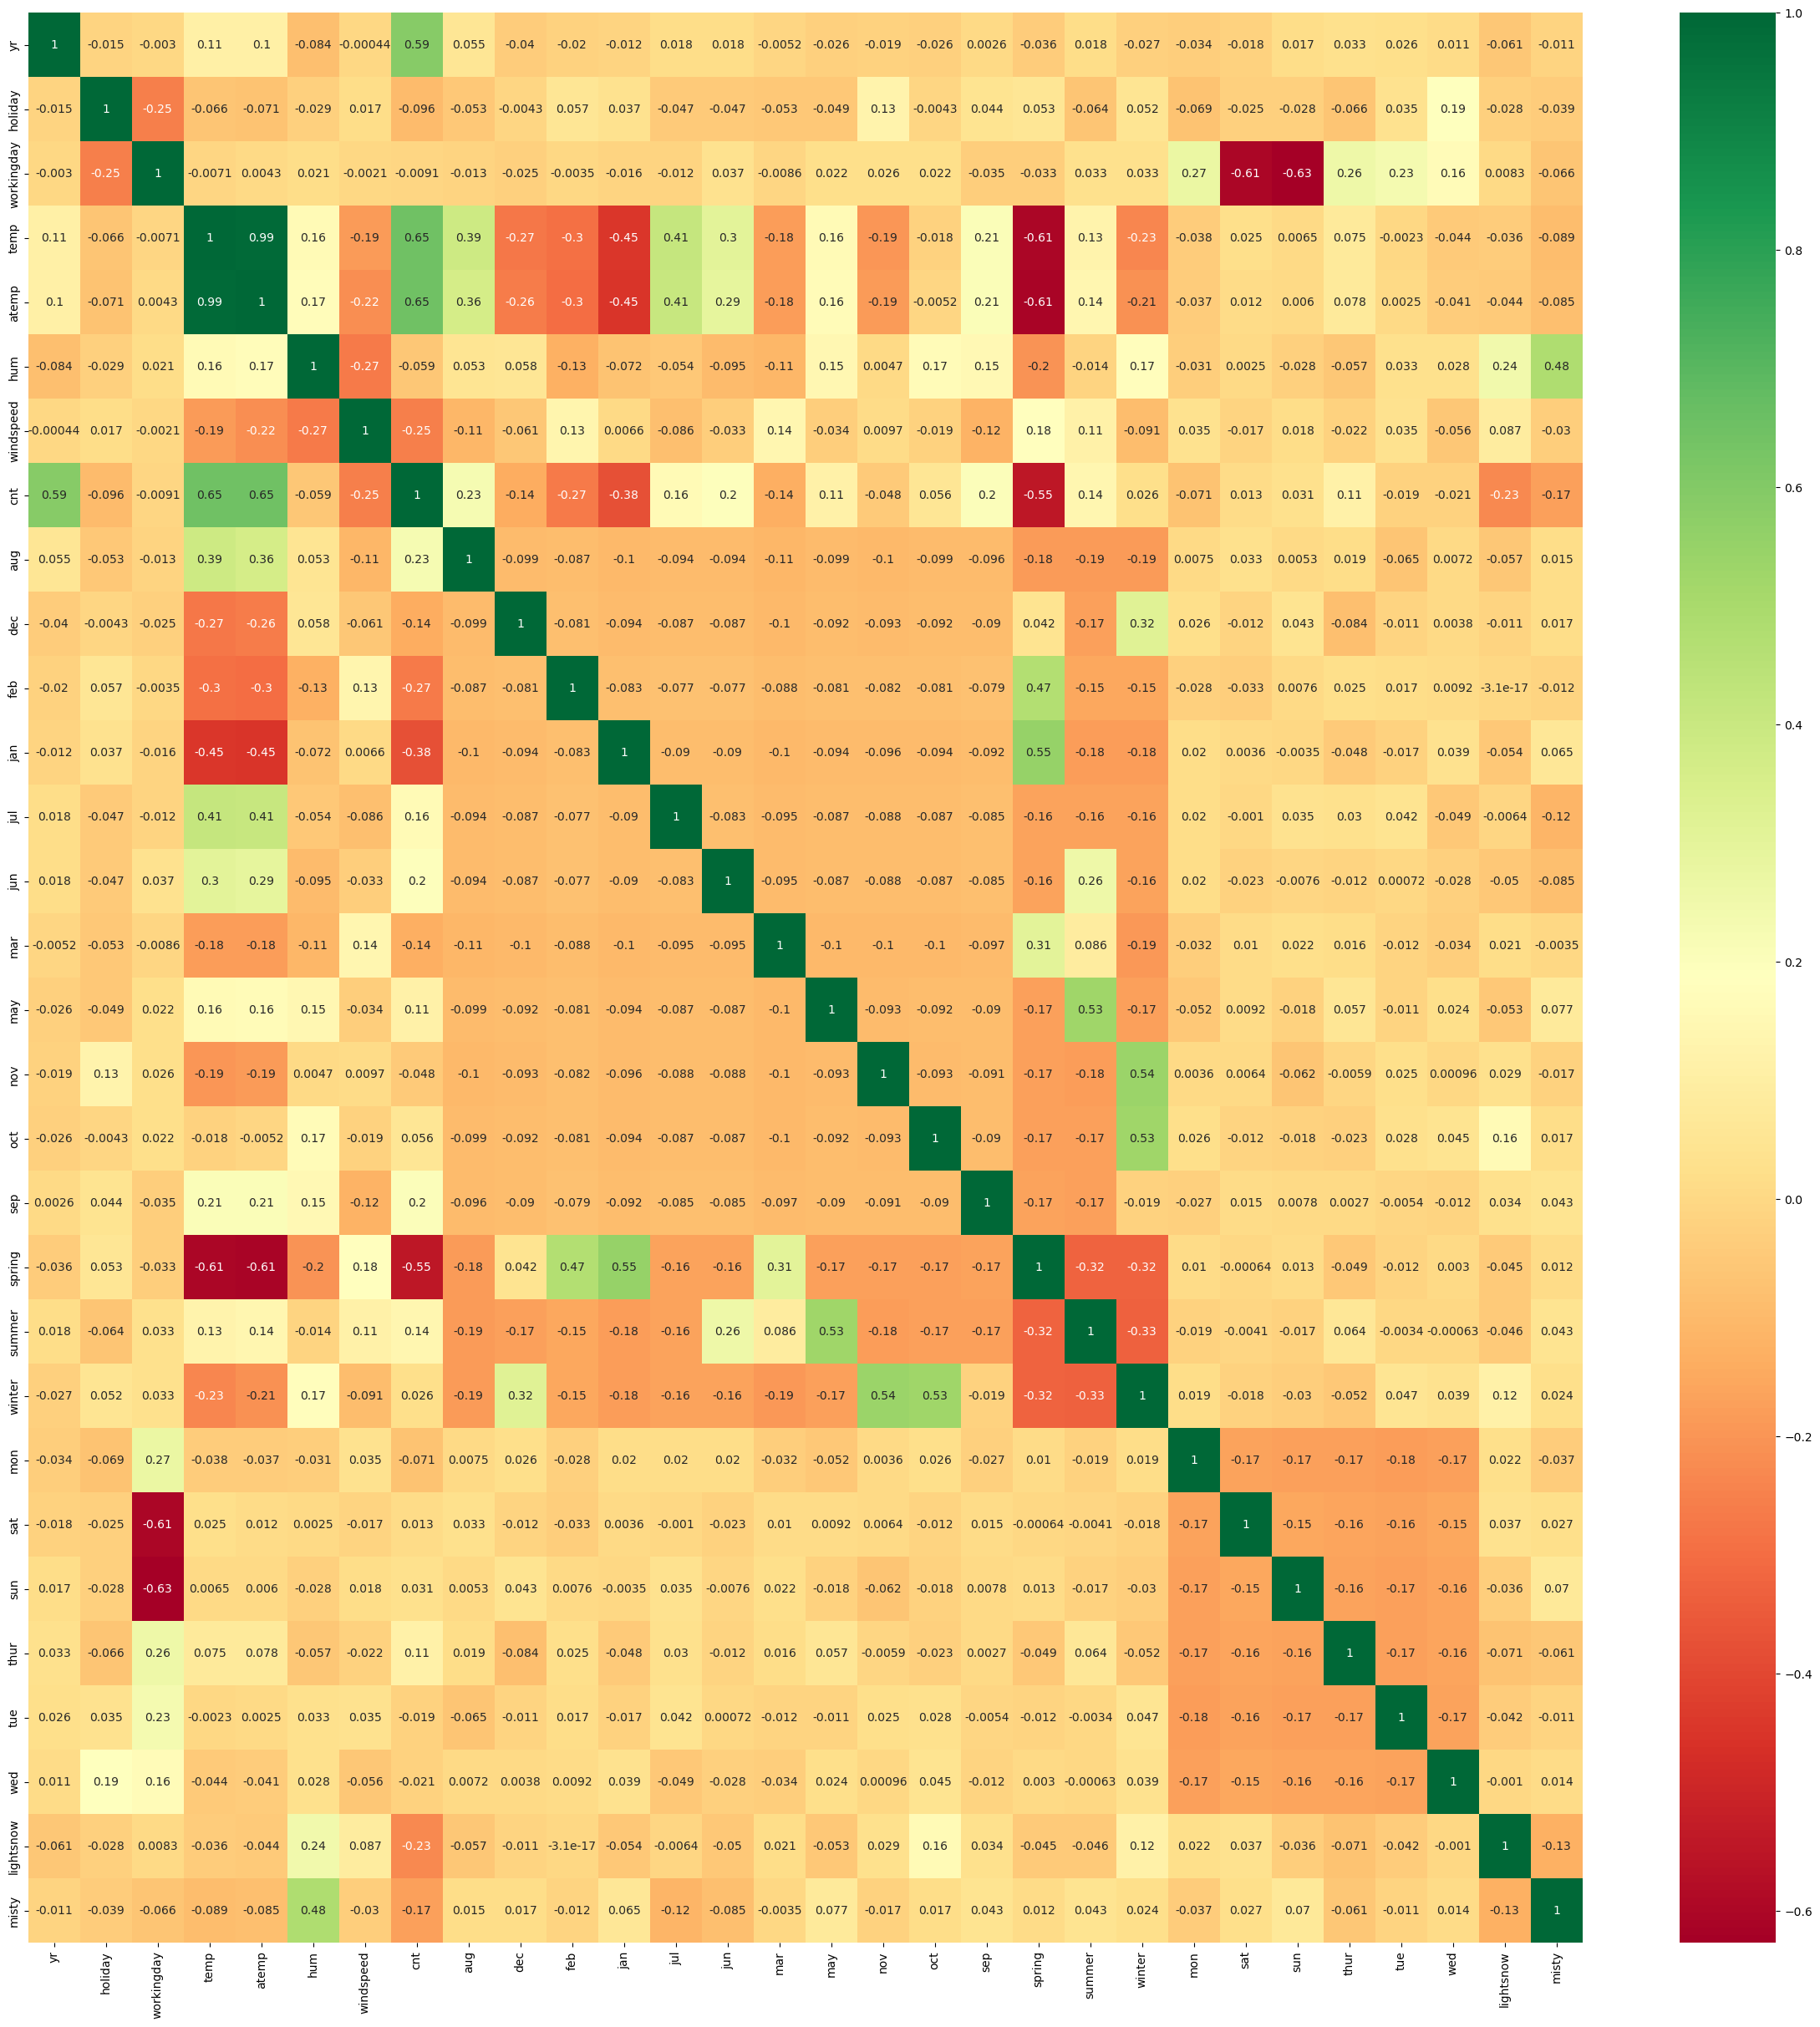

In [46]:
# Check the correlation coeffiecients to see which variables are co related.

plt.figure(figsize= (30,30))
sns.heatmap(df_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

cnt seems to have correlation with year variable and temp.Similarly misty and humidity shows correlation.
Spring season with jan and feb month, summer season with may month and winter season with october and november month show good 
correlation.

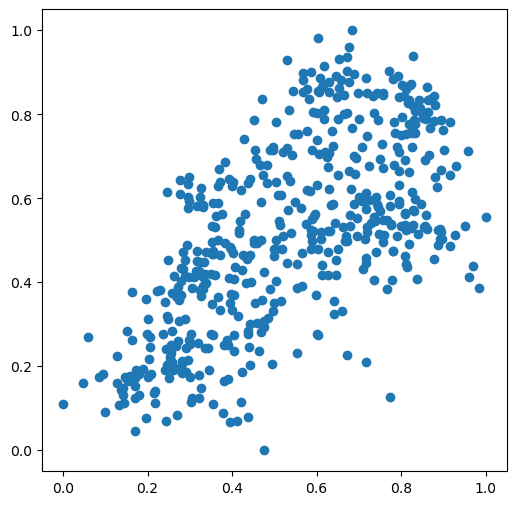

In [47]:
# Visualising the one of the correlation to see the trends via scatterplot.
plt.figure(figsize=(6,6))
plt.scatter(df_train.temp,df_train.cnt)
plt.show()


Visualisation confirms positive trends between cnt and temp.

In [48]:
# Building linear model.
y_train= df_train.pop("cnt")
X_train = df_train

In [49]:
# Recursive feature elimination

lm= LinearRegression()
lm.fit(X_train, y_train)

rfe= RFE(lm,n_features_to_select=15)
rfe= rfe.fit(X_train, y_train)

In [50]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thur', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('lightsnow', True, 1),
 ('misty', True, 1)]

In [51]:
# Selecting the variables which has selected by the RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'jan', 'jul', 'nov',
       'sep', 'spring', 'summer', 'winter', 'lightsnow', 'misty'],
      dtype='object')

In [52]:
# Checking the varibales which are rejeceted by the RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thur', 'tue', 'wed'],
      dtype='object')

In [53]:
# Generic function to calculate VIF of the variables.

def calculateVIF(df):
    vif = pd.DataFrame()
    
    vif["features"] = df.columns
    
    vif["VIF"]= [variance_inflation_factor(df.values,i)for i in range (df.shape[1])]
    
    vif["VIF"] = round(vif["VIF"],2)
    
    vif = vif.sort_values(by= "VIF", ascending= False)
    
    return vif

In [54]:
# Dataframe with rfe selected variables
X_train_rfe = X_train[col]

In [55]:
# calculate VIF
calculateVIF(X_train_rfe)

,features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
10,spring,4.37
12,winter,4.06
11,summer,2.82
14,misty,2.32
0,yr,2.09
8,nov,1.85
6,jan,1.75


(hum)Humidity shows high VIF value

## STEP 5 - Buliding a linear Regression model

In [56]:
# Buliding first linear model.

X_train_lm1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          8.15e-189
Time:                        20:48:51   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.0

In [57]:
# As humidity shows high VIF values hence we can drop it.
X_train_new = X_train_rfe.drop(["hum"], axis=1)

# Run the function to calculate VIF for new model.
calculateVIF(X_train_new )

,features,VIF
2,temp,5.17
3,windspeed,4.67
11,winter,2.95
9,spring,2.89
10,summer,2.24
0,yr,2.07
7,nov,1.81
5,jan,1.66
6,jul,1.59
13,misty,1.57


VIF values looks good now. Will check for reducing it furthur?

##### Buliding second linear model

In [58]:
# Buliding second linear model
X_train_lm2 = sm.add_constant(X_train_new)

lm_2 = sm.OLS(y_train, X_train_lm2).fit()

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          4.75e-186
Time:                        20:48:51   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.0

In [59]:
# We can drop Nov variable as it has high p value
X_train_new = X_train_new.drop(["nov"], axis=1)

# Calculate VIF again
calculateVIF(X_train_new)

,features,VIF
2,temp,5.14
3,windspeed,4.62
8,spring,2.89
9,summer,2.24
0,yr,2.07
10,winter,2.05
5,jan,1.65
6,jul,1.59
12,misty,1.57
7,sep,1.34


VIF doesnt seem to be affected, Lets continue with the furthur modelling.

#### Buliding third linear model.

In [60]:
X_train_lm3 = sm.add_constant(X_train_new)
lm_3 =        sm.OLS(y_train, X_train_lm3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          2.74e-186
Time:                        20:48:51   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.031      7.310      0.0

In [61]:
## Dropping dec variable as it has high P value
X_train_new = X_train_new.drop(["dec"], axis=1)

## Clculating VIF again
calculateVIF(X_train_new)

,features,VIF
2,temp,5.13
3,windspeed,4.62
7,spring,2.75
8,summer,2.24
0,yr,2.07
9,winter,1.78
4,jan,1.61
5,jul,1.59
11,misty,1.56
6,sep,1.34


#### Biliding forth linear model

In [62]:
X_train_lm4 = sm.add_constant(X_train_new)

lm_4 = sm.OLS(y_train, X_train_lm4).fit()

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          8.14e-187
Time:                        20:48:51   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.0

In [63]:
## Dropping the variable jan as it has high p value
X_train_new = X_train_new.drop(["jan"], axis=1)

## Calculating VIF again
calculateVIF(X_train_new)

,features,VIF
2,temp,5.09
3,windspeed,4.60
7,summer,2.23
6,spring,2.08
0,yr,2.07
8,winter,1.78
4,jul,1.58
10,misty,1.55
5,sep,1.34
9,lightsnow,1.08


#### Building 5th Linear Model

In [64]:
X_train_lm5 = sm.add_constant(X_train_new)

Lm_5 = sm.OLS(y_train, X_train_lm5).fit()

print(Lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          5.06e-187
Time:                        20:48:51   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.0

In [65]:
## Dropping jul as it has high P value

X_train_new = X_train_new.drop(["jul"], axis=1)

## Calculating VIF 
calculateVIF(X_train_new)

,features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
5,spring,1.99
6,summer,1.90
7,winter,1.63
9,misty,1.55
4,sep,1.23
8,lightsnow,1.08
1,holiday,1.04


VIF seems to bee good as its below 5

#### Building the 6th model

In [66]:
X_train_lm6 = sm.add_constant(X_train_new)

lm_6 = sm.OLS(y_train,X_train_lm6).fit()

print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          1.47e-186
Time:                        20:48:52   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.030      6.447      0.0

We can consider the above model i.e lm6 ,as it seem to have less multicolinearity between the predictors 
and the p-values for all the predictors seems to be significant.

F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero,
states that the overall model is significant

In [67]:
# Checking the parameters and thier co effecient values.
lm_6.params

const        0.190855
yr           0.234132
holiday     -0.096316
temp         0.477737
windspeed   -0.148098
sep          0.090998
spring      -0.055406
summer       0.062076
winter       0.094476
lightsnow   -0.285031
misty       -0.078741
dtype: float64

### STEP -6 Residual Analysis of the train data and validation

In [68]:
X_train_lm6

,const,yr,holiday,temp,windspeed,sep,spring,summer,winter,lightsnow,misty
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,0,0,1
728,1.0,1,0,0.245101,0.663106,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,0,1
111,1.0,0,0,0.345824,0.380981,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,1,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,0,1


In [69]:
y_train_pred = lm_6.predict(X_train_lm6)

In [70]:
r2_score_train = r2_score(y_train, y_train_pred)
round(r2_score_train,4)

0.8327

#### Normality of error terms

Text(0.5, 0, 'Errors')

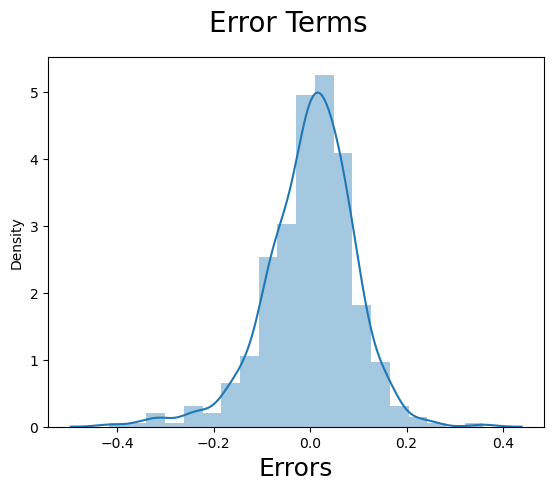

In [71]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal ditsribution.

#### Multicolinearity

In [72]:
calculateVIF(X_train_new)

,features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
5,spring,1.99
6,summer,1.90
7,winter,1.63
9,misty,1.55
4,sep,1.23
8,lightsnow,1.08
1,holiday,1.04


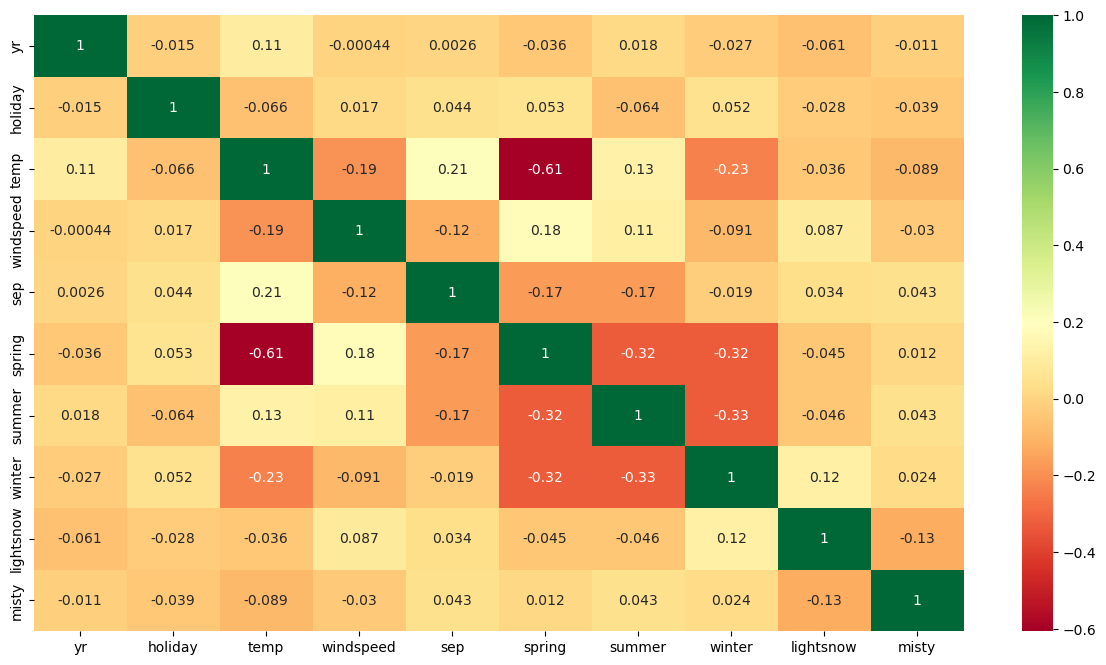

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(), annot =True, cmap= "RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

### Linearity

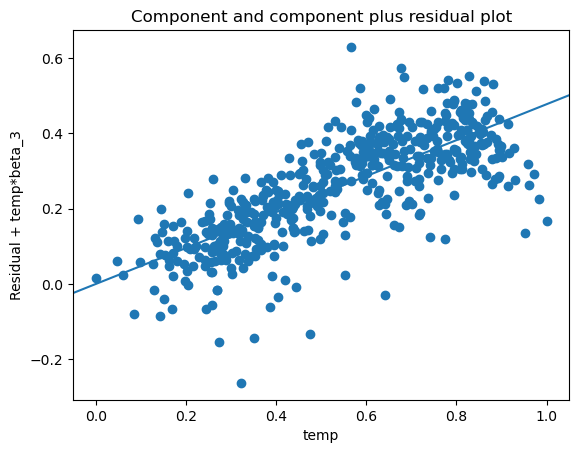

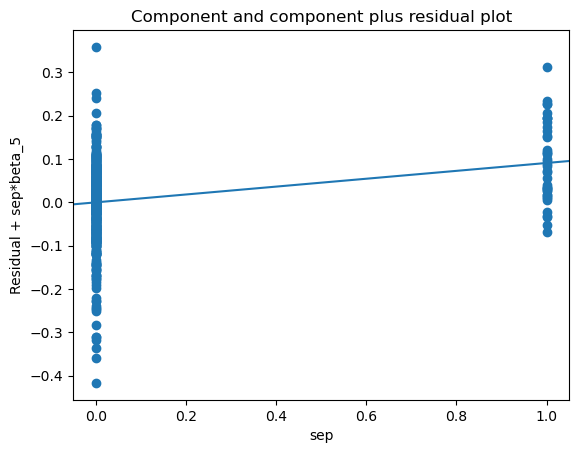

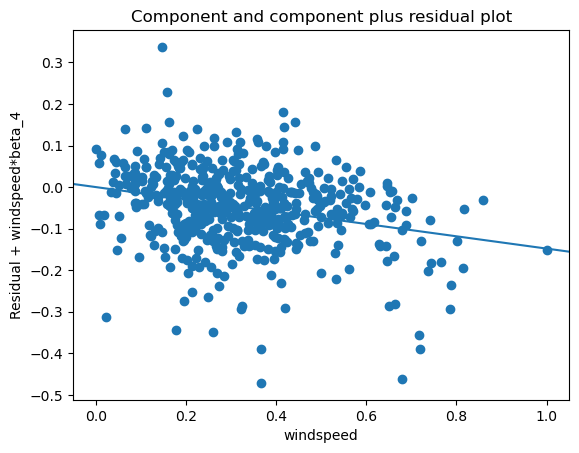

In [74]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lm_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lm_6, 'windspeed')
plt.show()

### Homoscedasticity

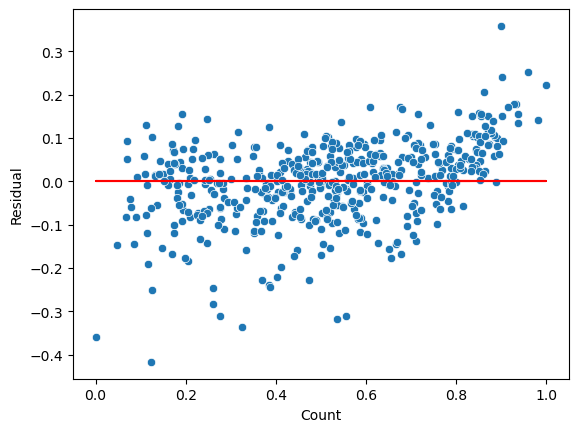

In [75]:
y_train_pred = lm_6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(x= y_train, y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible patter observed from above plot for residuals.

Independence of residuals
Durbin-Watson value of final model lr_6 is 2.085, which signifies there is no autocorrelation.

## STEP-7 Making Prediction using final model.

In [76]:
## Applying scaling to the test data

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thur,tue,wed,lightsnow,misty
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,1,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,1,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,1,0,0,1,0,0,0,0,0,0


In [77]:
num_var = ["temp", "atemp", "hum", "windspeed", "cnt"]
df_test[num_var] = scaler.fit_transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thur,tue,wed,lightsnow,misty
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,0,...,1,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,0,1,0,1,0,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,0,0,...,1,0,0,1,0,0,0,0,0,0


In [78]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thur,tue,wed,lightsnow,misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.546074,0.530791,0.508362,0.418803,0.517923,0.059091,0.086364,...,0.263636,0.236364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.248645,0.227648,0.200875,0.187683,0.239498,0.236333,0.281541,...,0.441609,0.425817,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
y_test = df_test.pop("cnt")
X_test = df_test

In [80]:
col1 = X_train_new.columns
X_test = X_test[col1]

In [81]:
## Adding constant to the test dataframe
X_test_lm6 = sm.add_constant(X_test)

In [82]:
y_pred = lm_6.predict(X_test_lm6)

In [83]:
r2 = r2_score(y_test, y_pred)
round(r2, 4)

0.7935

### STEP -8 MODEL Evaluation

Text(0, 0.5, 'y_pred')

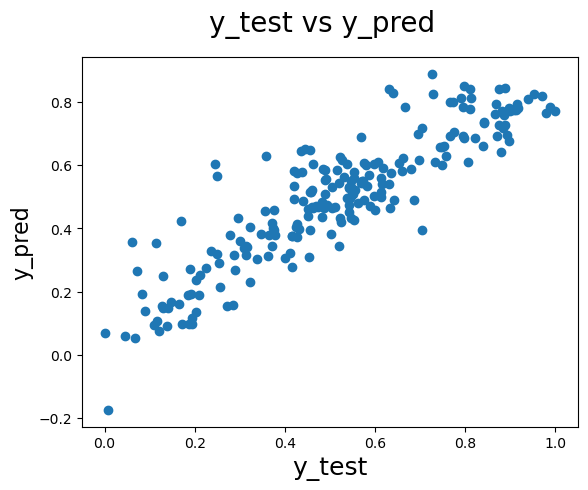

In [84]:
## Plotting y_test and y_pred to understand the  spread.

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [85]:
round(lm_6.params,4)

const        0.1909
yr           0.2341
holiday     -0.0963
temp         0.4777
windspeed   -0.1481
sep          0.0910
spring      -0.0554
summer       0.0621
winter       0.0945
lightsnow   -0.2850
misty       -0.0787
dtype: float64

We can see that the equation of our best fitted line is:

cnt=0.1909+0.2341×yr−0.0963×holiday+0.4777×temp−0.1481×windspeed+0.0910×sep−0.2850×Lightsnow−0.0787×Misty−0.0554×spring+0.0621×summer+0.0945×winter

In [86]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7836


In [87]:
#Calculating Adjusted-R^
adjusted_r2_train = round(1-(1-r2_score_train)*(X_train_new.shape[0]-1)/(X_train_new.shape[0]-X_train_new.shape[1]-1),4)
print(adjusted_r2_train)

0.8294


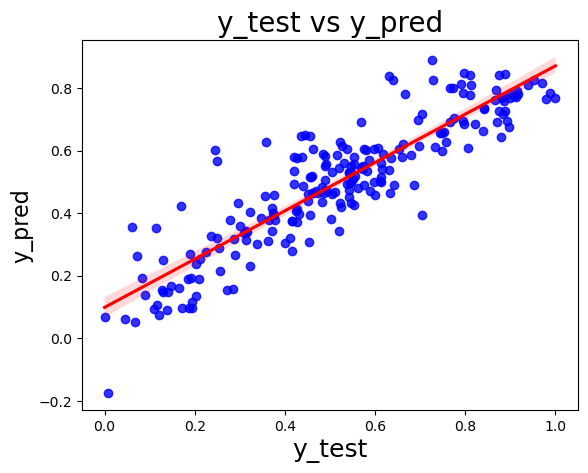

In [88]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.832
- Test dataset R^2           : 0.7935
- Train dataset Adjusted R^2 : 0.8294    
- Test dataset Adjusted R^2  : 0.7836


This seems to be a  good model that can very well 'Generalize' various datasets.

### Final Report

Demand of bikes depend on yr, holiday, temp, windspeed, sep, Light_snow, Misty, spring, summer and winter.